In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, decomposition
import seaborn as sns

data = np.load('.\\MLProject2024\\fashion_test.npy')

print("Shape of the data:", data.shape)

images = data[:, :-1] 
labels = data[:, -1]  


print("Shape of images:", images.shape)
data[:10]

Shape of the data: (5000, 785)
Shape of images: (5000, 784)


array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 3],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 3],
       [0, 0, 0, ..., 0, 0, 3]], dtype=uint8)

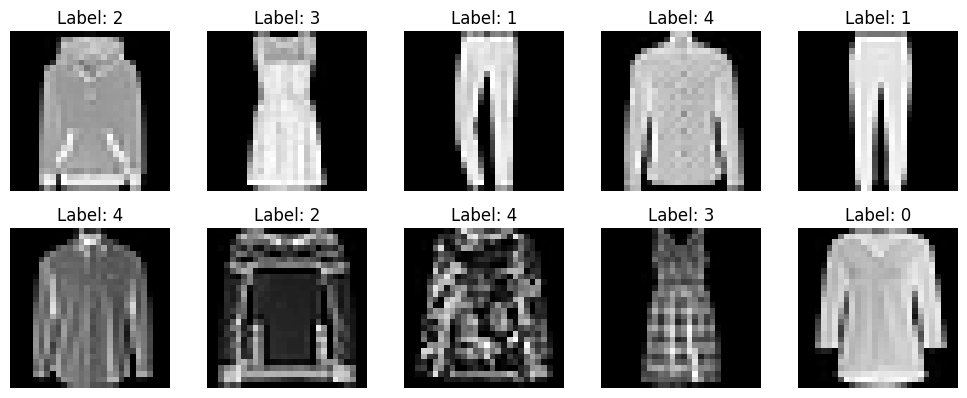

In [4]:
def plot_sample_images(images, labels, num_samples=10):
    random_indices = np.random.choice(images.shape[0], num_samples, replace=False) 

    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(5, 5, i + 1)  
        plt.imshow(images[random_indices[i]].reshape(28, 28), cmap='gray')  
        plt.title(f'Label: {labels[random_indices[i]]}') 
        plt.axis('off')
    plt.tight_layout()
    plt.show()


plot_sample_images(images, labels)

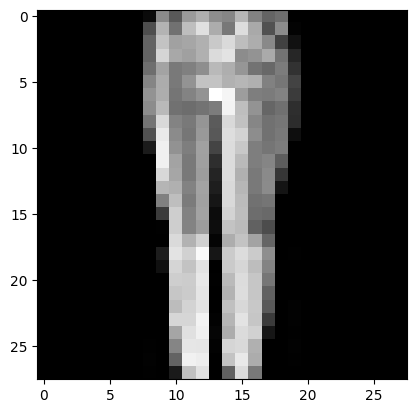

In [5]:
curr_img = np.reshape(data[0][:-1], (28,28))
plt.imshow(curr_img, cmap=plt.cm.gray);

In [6]:
train_df = pd.DataFrame(data)
class_mapping = {0:'Top',1:'Trouser',2:'Pullover',3:'Dress',4:'Shirt'}
train_df.iloc[:,-1].replace(class_mapping, inplace=True)

C:\Users\Mykyta\AppData\Local\Temp\ipykernel_20060\1167889196.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df.iloc[:,-1].replace(class_mapping, inplace=True)


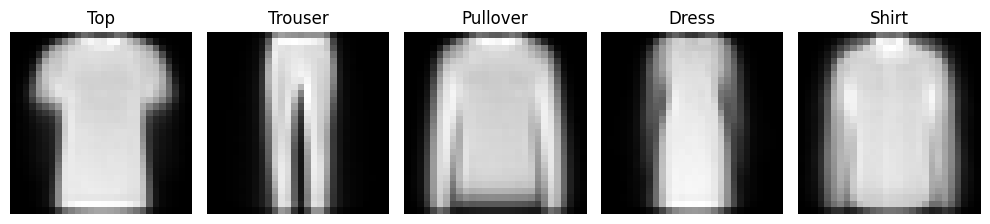

In [7]:
mean_images = []
for label in range(5):
    mean_image = np.mean(images[labels == label], axis=0).reshape(28, 28)
    mean_images.append(mean_image)

plt.figure(figsize=(10, 8))
for i, mean_image in enumerate(mean_images):
    plt.subplot(1, 5, i + 1)
    plt.imshow(mean_image, cmap='gray')
    plt.title(class_mapping[i])
    plt.axis('off') 
plt.tight_layout()
plt.show()

In [8]:
mean = np.mean(data)
median = np.median(data)
minn = np.min(data)
maxx = np.max(data)
std = np.std(data)
print(f"{mean}, {median}, {minn}, {maxx}, {std}")

77.34612917197452, 17.0, 0, 255, 89.87642780424174


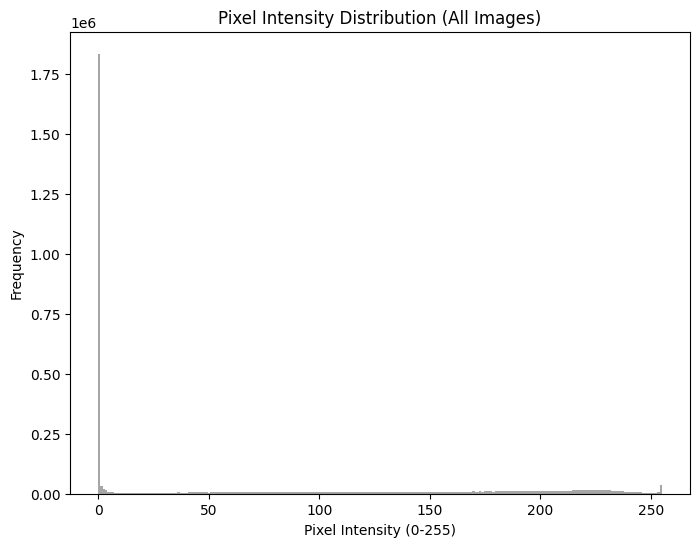

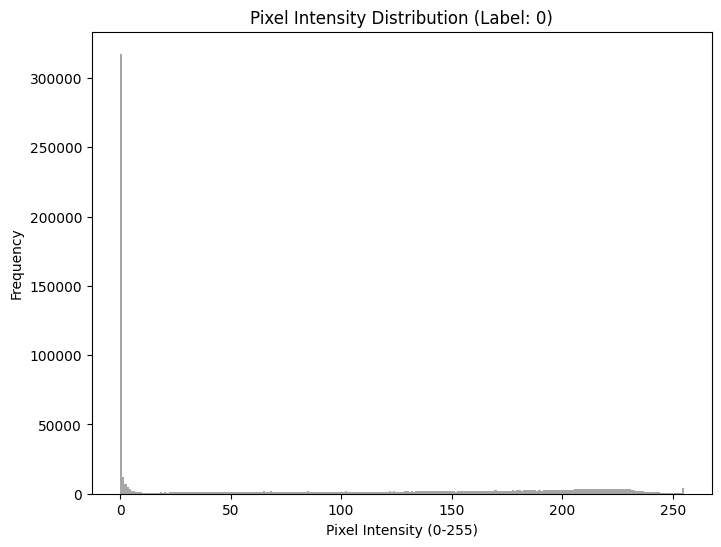

In [9]:
def plot_intensity_histogram(images, labels=None, label=None, bins=256):
    if label is not None:
        images = images[labels == label]
    
    all_pixels = images.flatten()

    plt.figure(figsize=(8, 6))
    plt.hist(all_pixels, bins=bins, color='gray', alpha=0.7)
    plt.title(f'Pixel Intensity Distribution (Label: {label})' if label is not None else 'Pixel Intensity Distribution (All Images)')
    plt.xlabel('Pixel Intensity (0-255)')
    plt.ylabel('Frequency')
    plt.show()

plot_intensity_histogram(images)

plot_intensity_histogram(images, labels=labels, label=0)

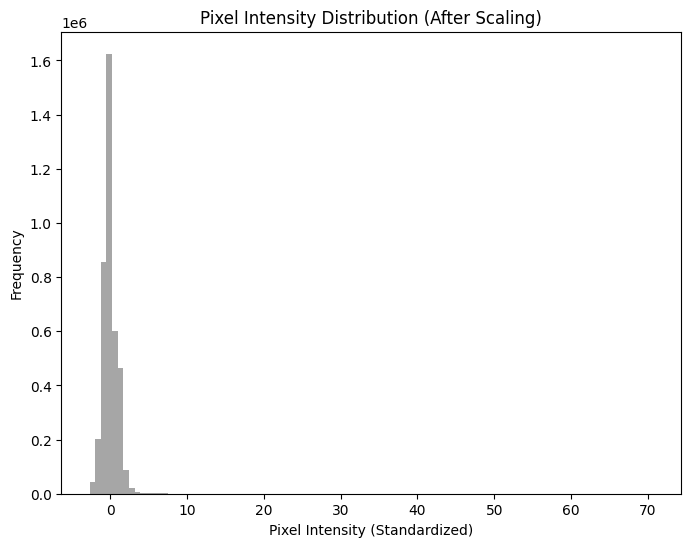

In [10]:
x = train_df.loc[:, :783].values
x = preprocessing.StandardScaler().fit_transform(x)
x.shape

flattened_scaled_pixels = x.flatten()

plt.figure(figsize=(8, 6))
plt.hist(flattened_scaled_pixels, bins=100, color='gray', alpha=0.7)
plt.title('Pixel Intensity Distribution (After Scaling)')
plt.xlabel('Pixel Intensity (Standardized)')
plt.ylabel('Frequency')
plt.show()

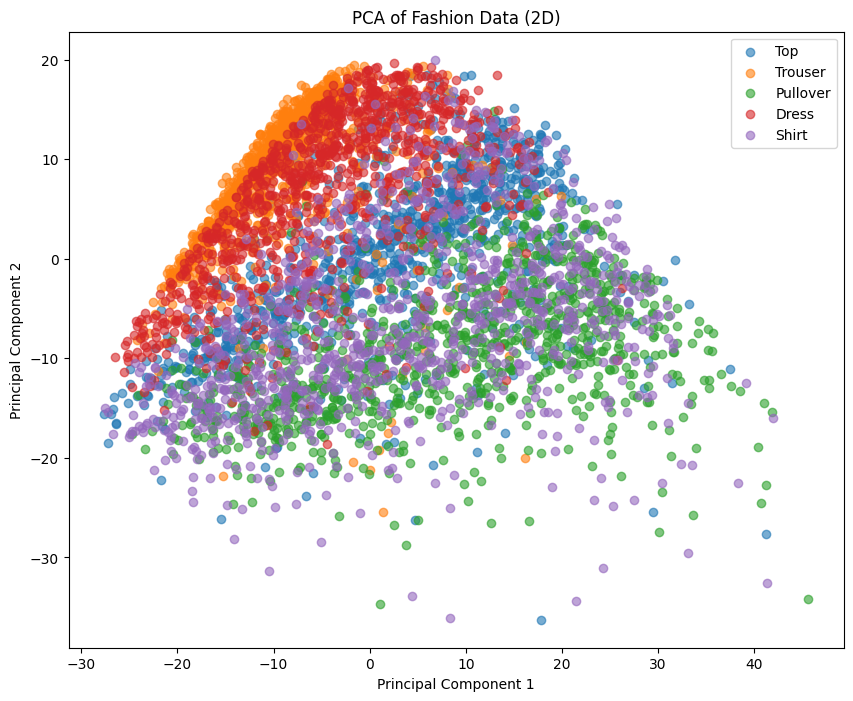

In [11]:
pca = decomposition.PCA()
pca_train = pca.fit_transform(x)

plt.figure(figsize=(10, 8))

for label in np.unique(labels):
    plt.scatter(pca_train[labels == label, 0], pca_train[labels == label, 1], 
                label=class_mapping[label], alpha=0.6)

plt.title('PCA of Fashion Data (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [12]:
print(pca.components_[:10])

[[-9.15255047e-19  2.69553993e-03  8.27769535e-04 ...  1.39073118e-02
   4.38535594e-03  1.53486300e-03]
 [ 7.44739557e-19 -4.21145911e-03 -5.82847972e-03 ... -2.10905394e-02
  -1.38851453e-02 -8.16971380e-03]
 [-3.08766582e-19  1.34686517e-02  1.38482580e-02 ...  5.97427656e-03
   2.14011770e-02  2.02155128e-02]
 ...
 [-1.10257555e-18  1.24723037e-02  2.80736433e-02 ...  4.06903444e-02
   3.32458230e-02  2.14404799e-02]
 [-3.73801365e-18  2.90290022e-03  9.36327131e-03 ...  3.52848054e-02
   1.12374370e-02  2.13084846e-02]
 [ 1.69867071e-18  7.10446674e-03  1.50050438e-02 ...  1.02086628e-02
   8.13924414e-02  8.97524940e-02]]


In [17]:
print(sum(pca.explained_variance_ratio_[:50]))
print(pca.explained_variance_ratio_[:10])

0.8202141048492998
[0.2220528  0.1409841  0.06415513 0.05433026 0.03147899 0.02811723
 0.02181897 0.01815563 0.01480931 0.01443552]


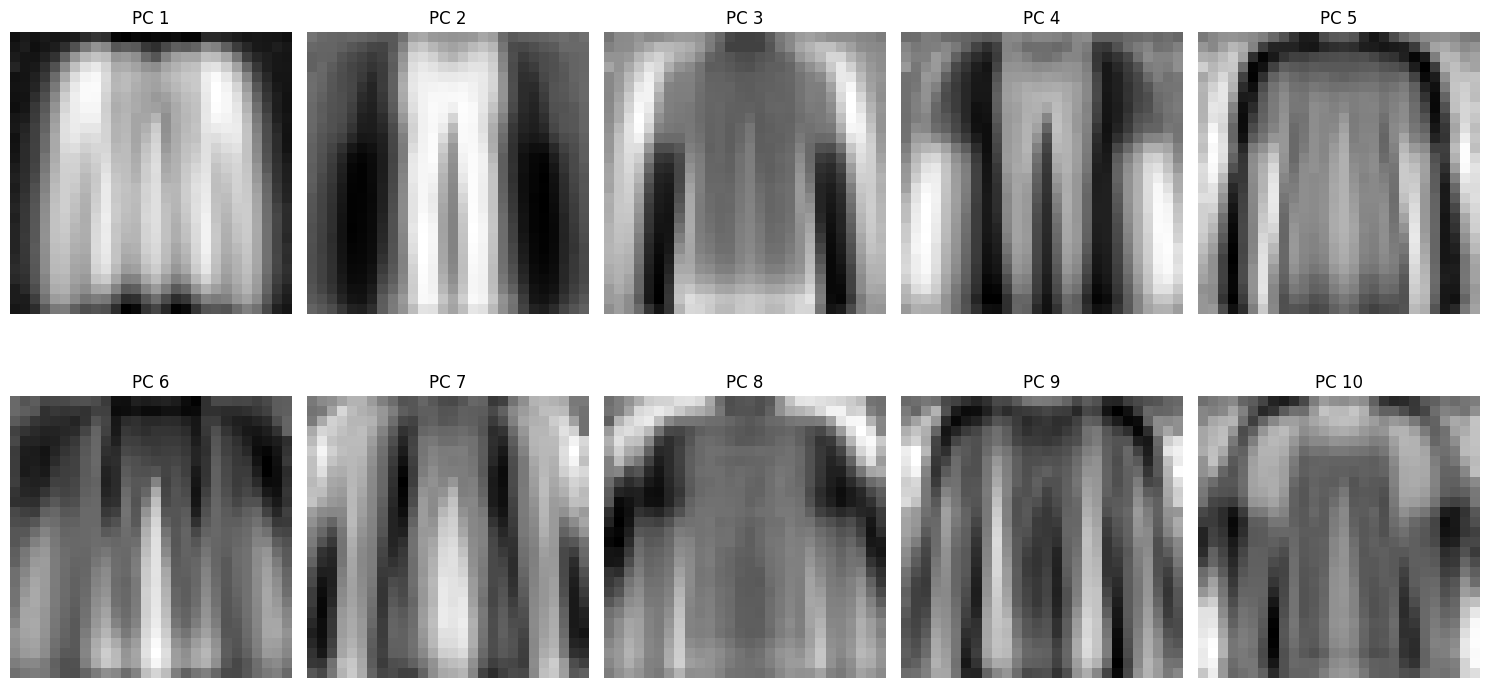

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(pca.components_[i].reshape(28, 28), cmap='gray')
    plt.title(f'PC {i + 1}')
    plt.axis('off')
plt.tight_layout()
plt.show()


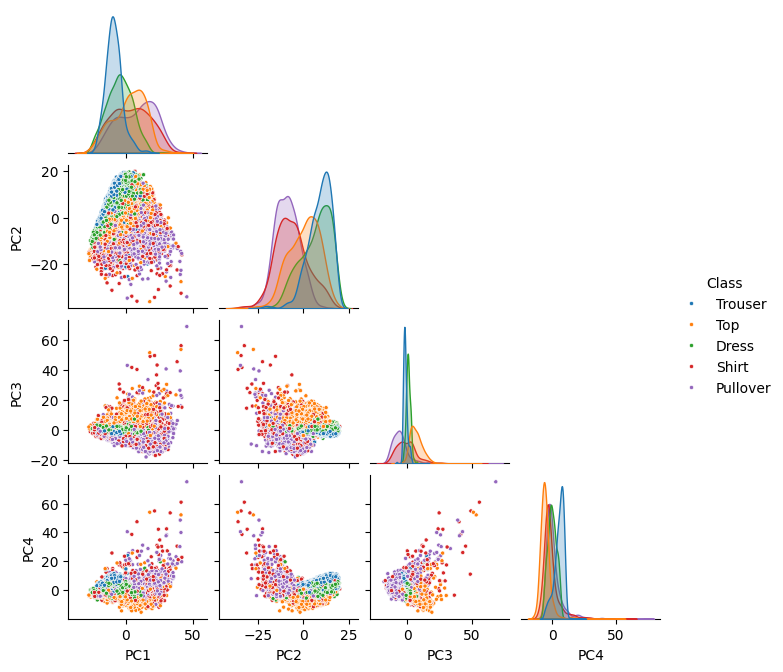

In [15]:
pc_labels = ['PC' + str(a) for a in range(1, len(pca_train[0])+1)]
pca_df = pd.DataFrame(pca_train, columns = pc_labels)

y = train_df.iloc[:,-1]

pca_4 = pca_df.copy()
pca_4 = pca_4[['PC1','PC2','PC3','PC4']]
pca_4['Class'] = y.reset_index(drop=True) 

sns.pairplot(data=pca_4,hue='Class',corner=True, markers = '.',height=1.7)
plt.show()